<a href="https://colab.research.google.com/github/ParthGadekar0631/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction


### Data Preparation

In [243]:
# Importing all the necessary libraries that would be needed in the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, mean_squared_error, r2_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

In [244]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('heart.csv')

# print the first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [245]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [246]:
# Checking for missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


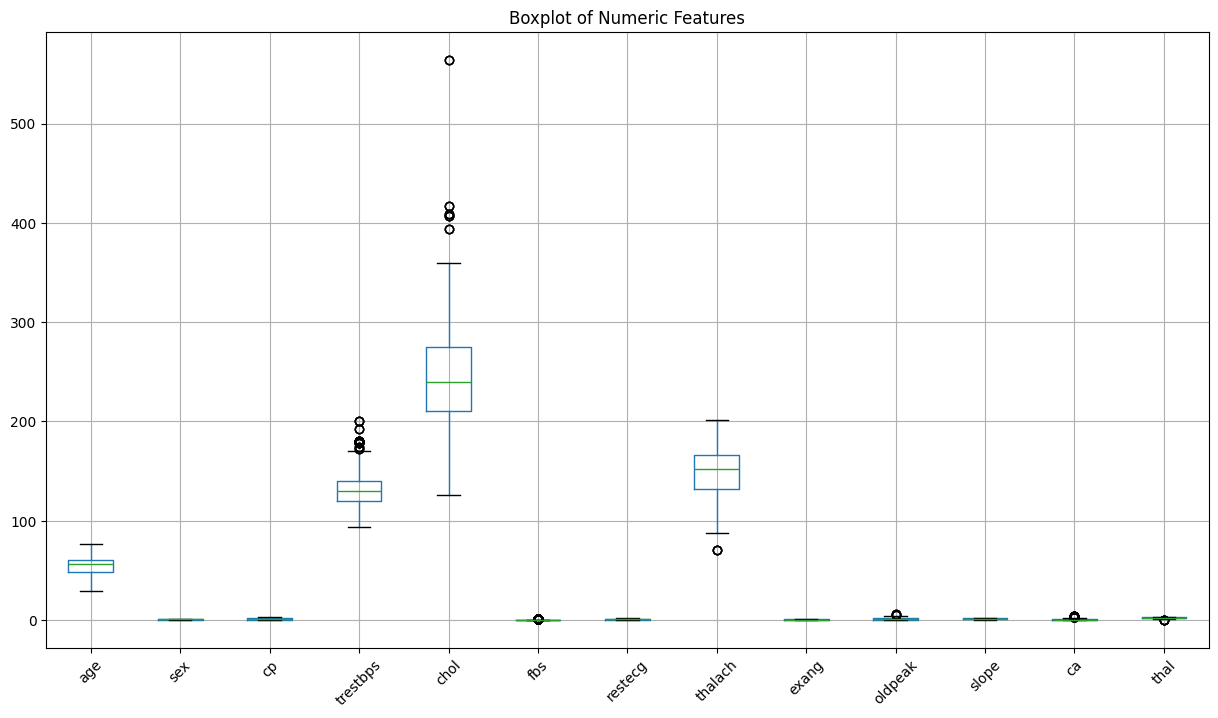

{'age': 0,
 'sex': 0,
 'cp': 0,
 'trestbps': 0,
 'chol': 0,
 'fbs': 0,
 'restecg': 0,
 'thalach': 0,
 'exang': 0,
 'oldpeak': 0,
 'slope': 0,
 'ca': 0,
 'thal': 0}

In [247]:
# Define numerical columns
target_col = 'target'  # Dependent variable
numerical_cols = df.drop(columns=[target_col]).select_dtypes(include=['int64', 'float64']).columns

# Boxplot to visualize outliers
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot(rot=45)
plt.title('Boxplot of Numeric Features')
plt.show()

# Using IQR to detect and handle outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Handling outliers
for col in ['fbs', 'ca', 'trestbps', 'chol']:
    _, lower, upper = detect_outliers_iqr(df, col)
    df[col] = np.clip(df[col], lower, upper)  # Cap extreme values

for col in ['thalach', 'oldpeak', 'thal']:
    _, lower, upper = detect_outliers_iqr(df, col)
    df = df[(df[col] >= lower) & (df[col] <= upper)]  # Remove extreme outliers

# Checking for outliers in each numerical column
outlier_counts = {}
for col in numerical_cols:
    outliers, _, _ = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

# Display the number of outliers per column
outlier_counts


In [248]:
# Statisitcal measures about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.0,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,54.373386,0.696127,0.953327,131.207547,245.614697,0.0,0.527309,149.662363,0.334657,1.042006,1.396226,0.699106,2.336643,0.519364
std,9.107466,0.460157,1.030743,16.578796,47.832820,0.0,0.528510,22.465197,0.472105,1.114067,0.610467,0.888869,0.592261,0.499873
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.0,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.0,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.0,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,371.000000,0.0,2.000000,202.000000,1.000000,4.400000,2.000000,2.500000,3.000000,1.000000


In [249]:
# Checking the distribution of Target Variable
df['target'].value_counts()

,count
target,
1,523
0,484


1 --> Defective Heart

0 --> Healthy Heart

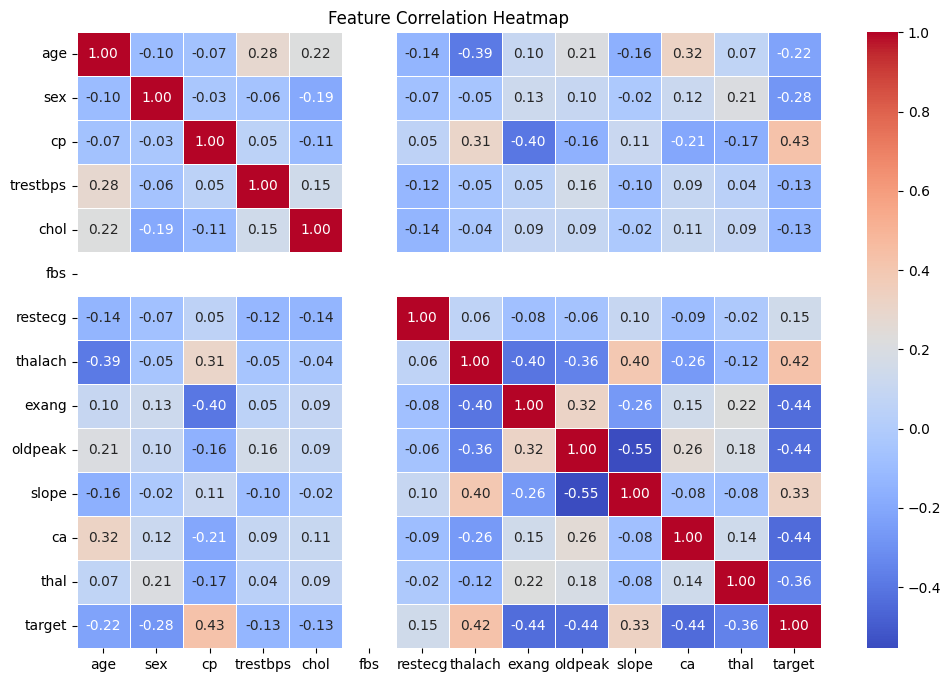

Dropped highly correlated features: set()


In [250]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Identify highly correlated features (threshold = 0.85)
thresh = 0.85
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > thresh:
            high_corr_features.add(correlation_matrix.columns[i])

# Drop highly correlated features
df = df.drop(columns=high_corr_features)

# Print removed features
print("Dropped highly correlated features:", high_corr_features)

##Splitting the Features and Target

In [251]:
X = df.drop(columns='target', axis=1)
Y = df['target']
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    0        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    0        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope   ca  thal  
0         2  2.0     3  
1         0  0.0     3  


In [252]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1007, dtype: int64


##Splitting the Data into Training and Test data

In [253]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=20029972)
print(X.shape, X_train.shape, X_test.shape)

(1007, 13) (805, 13) (202, 13)


##Model Training and Evaluation



### 1. Logistic Regression Model

In [254]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, Y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

In [255]:
# Model Evaluation
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

In [256]:
# Displaying Results
print("Logistic Regression Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

Logistic Regression Performance Metrics:
Accuracy: 0.8515
Precision: 0.8319
Recall: 0.8952
F1 Score: 0.8624
AUC-ROC Score: 0.9147


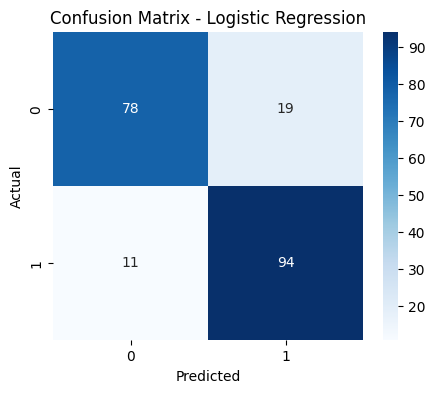

In [257]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### 2. K-Nearest Neighbors (KNN)

In [258]:
# Intialize and train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, Y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)
y_pred_prob = knn.predict_proba(X_test_scaled)[:, 1]

In [259]:
#Model Evalution
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

In [260]:
#Displaying the result of the Model Evaluation
print("K-Nearest Neighbors Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

K-Nearest Neighbors Performance Metrics:
Accuracy: 0.8416
Precision: 0.8476
Recall: 0.8476
F1 Score: 0.8476
AUC-ROC Score: 0.9489


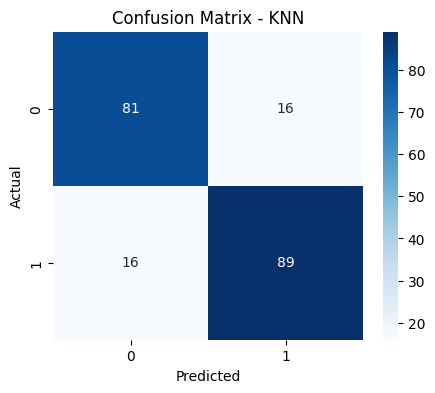

In [261]:
# Printing the Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

### 3. Decision Tree

In [262]:
# Initialize and Train Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

# Making predictions
y_pred = dt.predict(X_test)
y_pred_prob = dt.predict_proba(X_test)[:, 1]

In [263]:
# Model Evaluation
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

In [264]:
# Displaying the result of Model Evalution
print("Decision Tree Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

Decision Tree Performance Metrics:
Accuracy: 0.9802
Precision: 0.9633
Recall: 1.0000
F1 Score: 0.9813
AUC-ROC Score: 0.9794


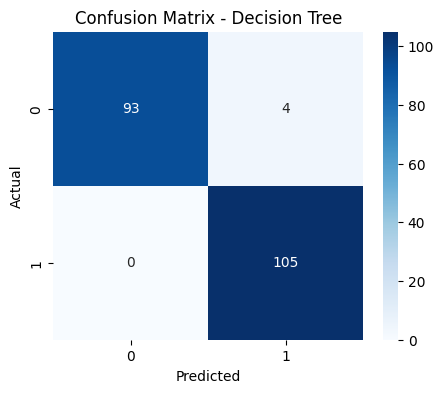

In [265]:
# Plotting the Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

### 4. Random Forest

In [266]:
# Initialize and Train Decision Tree model
rf = RandomForestClassifier(n_estimators=100, random_state=20029972)
rf.fit(X_train_scaled, Y_train)

# Make predictions
y_pred = rf.predict(X_test_scaled)
y_pred_prob = rf.predict_proba(X_test_scaled)[:, 1]

In [267]:
# Model Evaluation
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

In [268]:
# Displaying the results of the Model Evalution
print("Random Forest Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

Random Forest Performance Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC Score: 1.0000


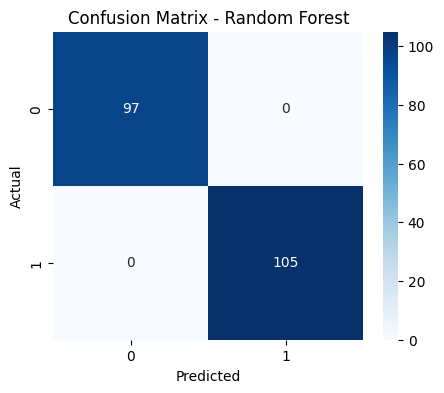

In [269]:
# Printing the Confusion Matrix for Random Forest
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### 5. Support Vector Machine (SVM)

In [270]:
# Initialize and train the SVM Classifier
svm = SVC(probability=True)
svm.fit(X_train, Y_train)

# Make Predictions
y_pred = svm.predict(X_test)
y_pred_prob = svm.predict_proba(X_test)[:, 1]

In [271]:
# Model Evalution
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

In [272]:
# Print the results of Model Evalution
print("Support Vector Machine (SVM) Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

Support Vector Machine (SVM) Performance Metrics:
Accuracy: 0.6782
Precision: 0.6639
Recall: 0.7714
F1 Score: 0.7137
AUC-ROC Score: 0.7289


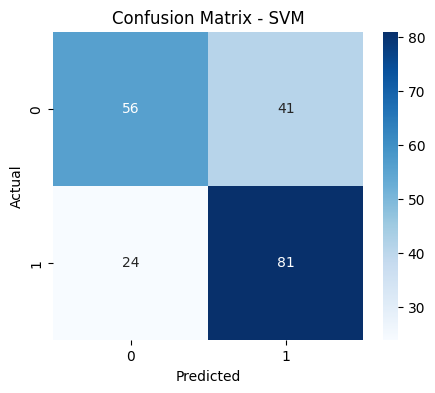

In [273]:
# Displaying the Confusion Matrix for SVM
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

### 6. Linear Regression

In [274]:
# Initialize and train the Ridge Regression Model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)

# Make predictions
y_pred_lr = ridge.predict(X_test)

In [275]:
# Model Evaluation
mse_lr = mean_squared_error(Y_test, y_pred_lr)
rmse_lr = mse_lr**0.5
r2_lr = r2_score(Y_test, y_pred_lr)

In [276]:
# Displaying the result of the Model Evaluation
print("Linear Regression Performance Metrics:")
print(f"Mean Squared Error: {mse_lr:.4f}")
print(f"Root Mean Squared Error: {rmse_lr:.4f}")
print(f"R-Squared: {r2_lr:.4f}")

Linear Regression Performance Metrics:
Mean Squared Error: 0.1286
Root Mean Squared Error: 0.3586
R-Squared: 0.4849


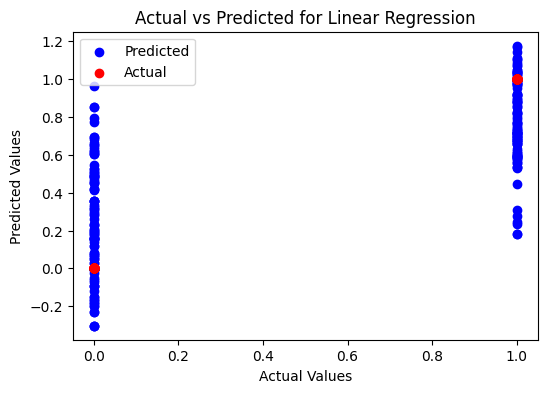

In [277]:
# Plotting the actual vs predicted values
plt.figure(figsize=(6,4))
plt.scatter(Y_test, y_pred_lr, color='blue', label='Predicted')
plt.scatter(Y_test, Y_test, color='red', label='Actual')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted for Linear Regression")
plt.legend()
plt.show()